In [16]:
%%time
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns

#for plot with ATLAS styple
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

import mplhep as hep
#hep.style.use(hep.style.ROOT) # For now ROOT defaults to CMS
# Or choose one of the experiment styles
hep.style.use(hep.style.ATLAS)
plt.style.use(hep.style.ATLAS)
#be able to read root files.
#and convert to numpy or pandas
import uproot
import gc

from IPython.lib.deepreload import reload
%load_ext autoreload
%autoreload 2

from cells import cell_data 

MCdata="cell_analysis_mu60"
MC_root = f"/Users/abletimin/cernbox/Trigger/re21.9/{MCdata}/cells_cls.root"
#MC_root = f"../re21.9/{MCdata}/cells.root"
tree_name = "ntuple"
#Branch = "cell_e"
#Branches = ["cell_e", "cell_phi", "cell_eta", "metTruth_et", "metTruth_phi"]
with uproot.open(MC_root+":"+tree_name) as events:
    x_bin = np.linspace(-3.15, 3.15, num=33)
    y_bin = np.linspace(-5, 5, num=51)
    cell_imgs_Run4_ex, cell_Run4_label = cell_data(events, x_bin, y_bin, weight='cell_ex',
                                              label='metTruth_ex',
                                         statistic='sum', batch_size=1000)
    gc.collect()
    
    cell_imgs_Run4_phi, _ = cell_data(events, x_bin, y_bin, weight='cell_phi',
                                 statistic='mean',label='metTruth_ex', unit=None, batch_size=1000)
    gc.collect()
    
file_from_edison="/Users/abletimin/cernbox/Trigger/ml-met-trigger/test.root"
with uproot.open(file_from_edison+":"+tree_name) as events:
    cell_imgs_Run2_ex, cell_Run2_label = cell_data(events, x_bin, y_bin, weight='cell_ex',
                                        label='metTruth_ex',
                                         statistic='sum', batch_size=1000)
    gc.collect()
    
    cell_imgs_Run2_phi, _ = cell_data(events, x_bin, y_bin, weight='cell_phi',
                                 statistic='mean',label='metTruth_ex', unit=None, batch_size=1000)
    gc.collect()
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


KeyboardInterrupt: 

In [14]:
cell_label.shape

(32000, 2)

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x13c29cac0>, cbar=<matplotlib.colorbar.Colorbar object at 0x13bd729a0>, text=[])

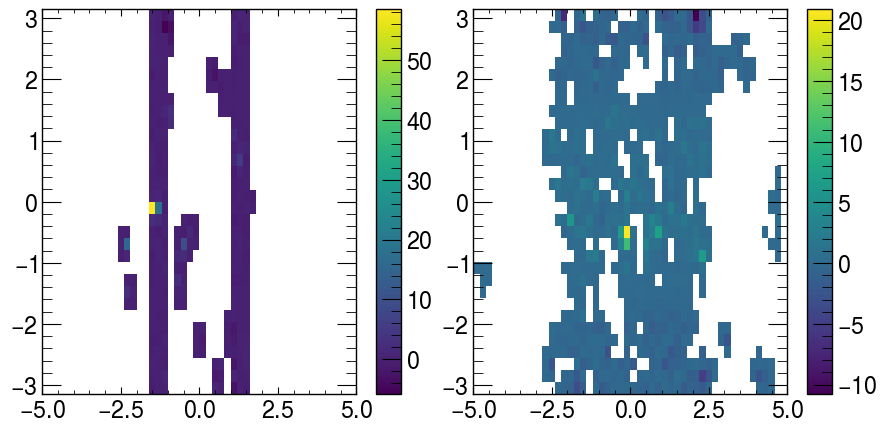

In [13]:
def get_img(data):
    data[data==0]=np.NaN
    return data

fig, axs = plt.subplots(1,2, figsize=(10,5))
ex_Run4 = get_img(cell_imgs_Run4_ex[15, :,:])
ex_Run2 = get_img(cell_imgs_Run2_ex[15, :,:]*1000)

hep.hist2dplot(ex_Run4, y_bin, x_bin, ax=axs[0])
hep.hist2dplot(ex_Run2, y_bin, x_bin, ax=axs[1])

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x13c394220>, cbar=<matplotlib.colorbar.Colorbar object at 0x13c2b85e0>, text=[])

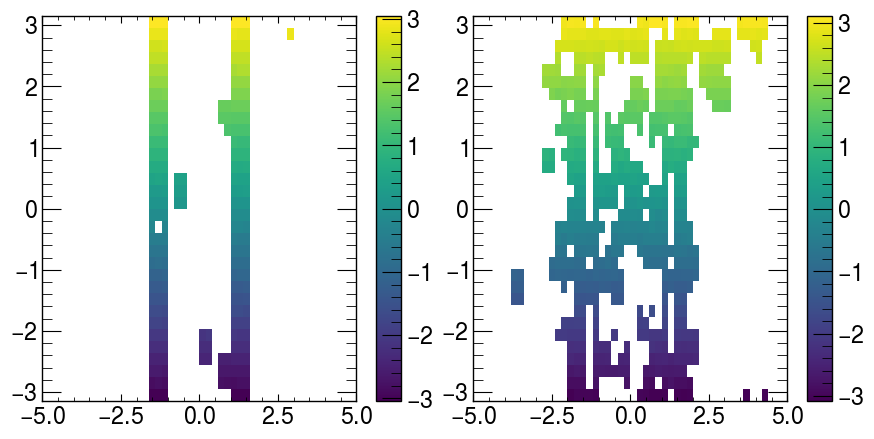

In [12]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
phi_Run4 = get_img(cell_imgs_Run4_phi[50, :,:])
phi_Run2 = get_img(cell_imgs_Run2_phi[50, :,:])

hep.hist2dplot(phi_Run4, y_bin, x_bin, ax=axs[0])
hep.hist2dplot(phi_Run2, y_bin, x_bin, ax=axs[1])